In [1]:
#pip install kagglehub[pandas-datasets]

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)

   ------------- -------------------------- 1/3 [pyyaml]
   -------------------------- ------------- 2/3 [kagglehub]
   ---------------------------------------- 3/3 [kagglehub]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "coffe.csv"

df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "jawad3664/coffee-shop",
    file_path
)


C:\Users\Thant Thaw Tun\AppData\Local\Temp\ipykernel_13080\1755695990.py:6: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


In [21]:
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,01/03/2024,15:50.5
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,01/03/2024,19:22.5
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,01/03/2024,20:18.1
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,01/03/2024,46:33.0
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,01/03/2024,48:14.6


In [58]:
df['Date'].max()

'31/12/2024'

In [22]:
sales = df.set_index("Date", inplace=False)

In [43]:
sales.columns
sales.dtypes

hour_of_day      int64
cash_type       object
money          float64
coffee_name     object
Time_of_Day     object
Weekday         object
Month_name      object
Weekdaysort      int64
Monthsort        int64
Time            object
dtype: object

In [24]:
sales.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Time
Date,,,,,,,,,,
01/03/2024,10,card,38.7,Latte,Morning,Fri,Mar,5,3,15:50.5
01/03/2024,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,19:22.5
01/03/2024,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,20:18.1
01/03/2024,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,46:33.0
01/03/2024,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,48:14.6


In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

C:\Users\Thant Thaw Tun\AppData\Local\Temp\ipykernel_13080\3673594533.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coffee_sales, x="coffee_name", y="money", palette="viridis")


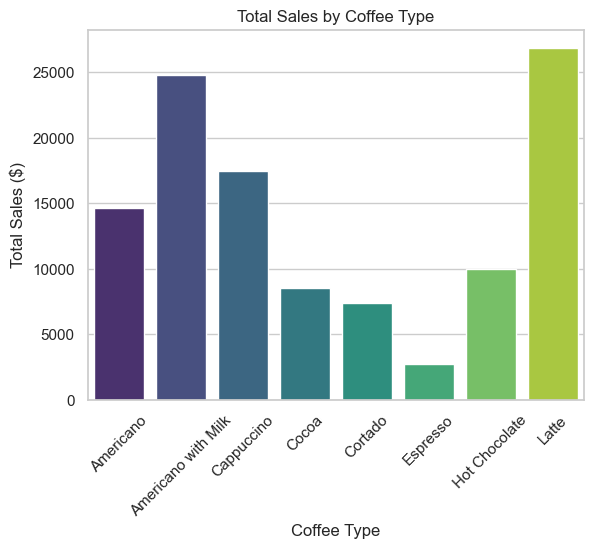

In [37]:
coffee_sales = sales.groupby("coffee_name")["money"].sum().reset_index()
sns.barplot(data=coffee_sales, x="coffee_name", y="money", palette="viridis")

plt.title("Total Sales by Coffee Type")
plt.xticks(rotation=45)
plt.xlabel("Coffee Type")
plt.ylabel("Total Sales ($)")
plt.show()

In [41]:
sales['cash_type'].value_counts()

cash_type
card    3547
Name: count, dtype: int64

C:\Users\Thant Thaw Tun\AppData\Local\Temp\ipykernel_13080\1328363211.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=preferred_time, x="Time_of_Day", y="money", order=order, palette="magma")


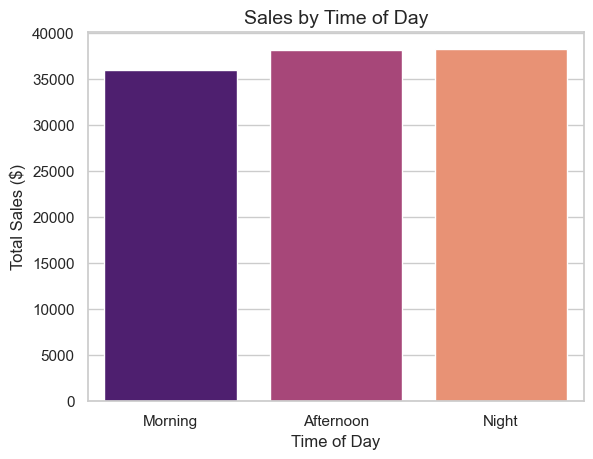

In [72]:
preferred_time = sales.groupby("Time_of_Day")["money"].sum().reset_index()
order = ["Morning", "Afternoon", "Night"]
sns.barplot(data=preferred_time, x="Time_of_Day", y="money", order=order, palette="magma")

plt.title("Sales by Time of Day", fontsize=14)
plt.xlabel("Time of Day")
plt.ylabel("Total Sales ($)")
plt.show()


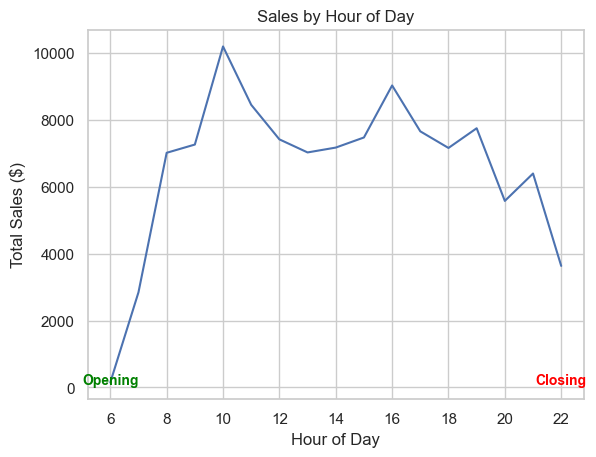

In [51]:
busy_hours = sales.groupby(sales['hour_of_day'])["money"].sum()
sns.lineplot(data=busy_hours, markers='o')

plt.xlabel("Hour of Day")
plt.ylabel("Total Sales ($)")
plt.title("Sales by Hour of Day")
plt.text(6, 0, "Opening", ha="center", va="bottom", fontsize=10, color="green", fontweight="bold")
plt.text(22, 0, "Closing", ha="center", va="bottom", fontsize=10, color="red", fontweight="bold")
plt.show()

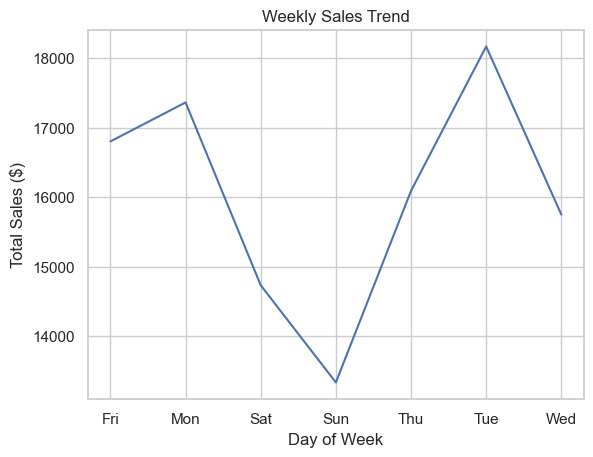

In [60]:
weekly_trend = sales.groupby("Weekday")["money"].sum()
sns.lineplot(data=weekly_trend, markers='o')
plt.title("Weekly Sales Trend")
plt.xlabel("Day of Week")
plt.ylabel("Total Sales ($)")
plt.show()

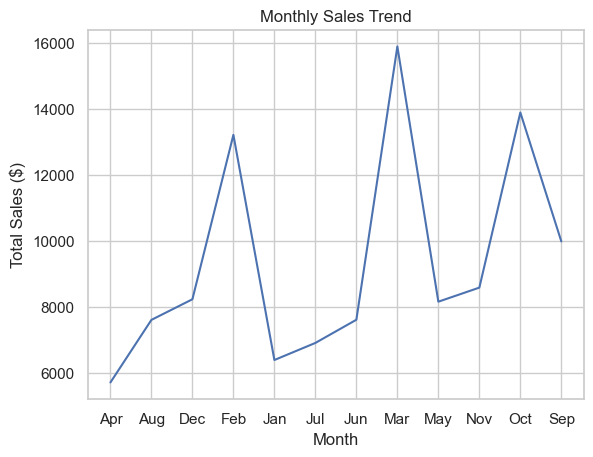

In [57]:
monthly_trend = sales.groupby("Month_name")["money"].sum()
sns.lineplot(data=monthly_trend, markers='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.show()